# LSTM with sliding window

# Building RNN, Data Pre-processing, 

In [3]:
#Reference : https://stackoverflow.com/questions/46166816/keras-lstm-is-not-learning

In [ ]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#print(test)
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


# Importing the training set
training_set=list()
df2=pd.read_csv('final_input_file.csv')
training_set = pd.read_csv('final_input_training.csv')
training_set = training_set.iloc[:,1:2].values
#print(training_set)
training_set_size=len(training_set)
#print(training_set_size)
predicted=list()
time=list()
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

# Getting the inputs and the ouputs
X1_train = training_set[0:training_set_size]
y_train = training_set[0:training_set_size]
#print(len(X_train))
# Reshaping
X2_train = np.reshape(X1_train, (training_set_size, 1, 1)) #3 dimesion
#print(X2_train)



#  Intializing, Compiling, Fitting RNN

In [ ]:
# window size parameters for sliding window
window=20
Begin=0
#train=list()
#test=list()
X=df2.no_of_instances
#print(X)
for i in range (0,(len(X)-window)):
    train2=X2_train[i:i+window]
    train1=X1_train[i:i+window]
    test=X2_train[i+window] 
    
    # Initialising the RNN
    regressor = Sequential()

    # Adding the input layer and the LSTM layer
    regressor.add(LSTM(units = 4, activation = 'tanh', input_shape = (None, 1)))

    # Adding the output layer
    regressor.add(Dense(units = 1))

    # Compiling the RNN
    regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

    # Fitting the RNN to the Training set
    regressor.fit(train2,train1, batch_size = 5, epochs = 500)
    # Part 3 - Making the predictions and visualising the results

    # Getting the real job instances
    
    # Getting predicted value of number of jobs
    #inputs = sc.transform(inputs)
    test = np.reshape(test, (1, 1, 1))
    predicted_job = regressor.predict(test)
    predicted_job = np.int(sc.inverse_transform(predicted_job))
    predicted.append(predicted_job)
    t=i+window
    tm=df2.time_interval[t]
    time.append(tm)
    print('this is predicted value for window',predicted,'time:',time)


# Visualising the results

In [27]:
# Visualising the results
test_set = pd.read_csv('final_input_file.csv')
real_value = test_set.iloc[:,1:2].values
plt.plot(real_value, color = 'red', label = 'Actual Values')
plt.plot(predicted, color = 'blue', label = 'Predicted Values')
plt.title('Workload Prediction')
plt.xlabel('Time')
plt.ylabel('Number of instances')
plt.legend()
plt.show()


NameError: name 'pd' is not defined

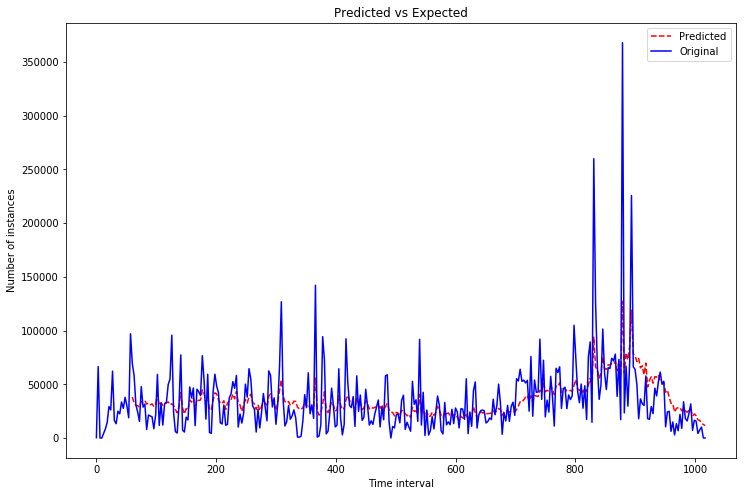

In [84]:
fig=plt.figure(figsize=(12,8))
plt.title("Predicted vs Expected")
plt.xlabel("Time interval")
plt.ylabel("Number of instances")
plt.plot(time, predicted, color='red', label='Predicted',linestyle='dashed')


plt.plot(df2.time_interval, df2.no_of_instances, color='blue', label='Original',linestyle='solid')
plt.legend()
plt.show()


In [3]:
test_set = pd.read_csv('final_input_file.csv')
#print(test_set[1])
real_value = test_set.iloc[:,1:2].values
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_value, predicted))
print('rmse',rmse)


NameError: name 'pd' is not defined

# Calculating RMSE

In [17]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_value, predicted))
print('rmse',rmse)

rmse 14606.82164093202


# Calculating MAPE :

In [24]:
for i in range(len(real_value)): 
    obs=real_value[i]
    yhat=predicted[i]
    APE=abs((yhat-obs)/obs)
    sumAPE=0
    sumAPE=sumAPE+APE
MAPE=(sumAPE/(len(real_value)))
print(MAPE)

35.965625
